In [2]:
import numpy as np
import pandas as pd
import os 
import tensorflow as tf
import tensorflow.keras as keras
from keras import Model
from keras.applications.densenet import DenseNet121
from keras.applications import vgg16
from keras.preprocessing import image
from keras.applications.densenet import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pathlib
from sklearn.metrics.pairwise import linear_kernel

In [3]:
path = '/Users/saninzulphi/Downloads/CS/e-commerce/images'
dataset_path = pathlib.Path(path)
dirs_names = os.listdir(dataset_path) # list content of dataset
dirs_names

['9733.jpg',
 '14147.jpg',
 '52112.jpg',
 '6400.jpg',
 '34297.jpg',
 '24084.jpg',
 '12536.jpg',
 '54563.jpg',
 '15259.jpg',
 '35189.jpg',
 '44770.jpg',
 '4217.jpg',
 '47279.jpg',
 '36480.jpg',
 '16750.jpg',
 '50705.jpg',
 '26693.jpg',
 '37946.jpg',
 '3578.jpg',
 '40516.jpg',
 '10321.jpg',
 '16988.jpg',
 '59047.jpg',
 '2666.jpg',
 '41608.jpg',
 '46167.jpg',
 '5109.jpg',
 '46601.jpg',
 '11981.jpg',
 '20584.jpg',
 '17328.jpg',
 '49532.jpg',
 '10447.jpg',
 '56412.jpg',
 '59721.jpg',
 '30797.jpg',
 '2100.jpg',
 '11759.jpg',
 '40270.jpg',
 '19305.jpg',
 '4571.jpg',
 '16036.jpg',
 '22393.jpg',
 '44016.jpg',
 '7078.jpg',
 '32180.jpg',
 '43779.jpg',
 '9055.jpg',
 '14621.jpg',
 '45308.jpg',
 '6366.jpg',
 '44002.jpg',
 '32194.jpg',
 '12244.jpg',
 '52660.jpg',
 '23099.jpg',
 '14635.jpg',
 '9041.jpg',
 '6372.jpg',
 '11995.jpg',
 '46615.jpg',
 '49526.jpg',
 '20590.jpg',
 '51369.jpg',
 '56406.jpg',
 '10453.jpg',
 '2114.jpg',
 '30783.jpg',
 '59735.jpg',
 '57718.jpg',
 '40264.jpg',
 '4565.jpg',
 '19311

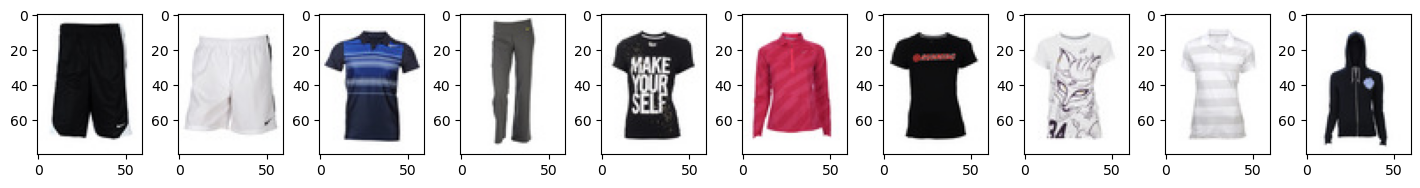

In [4]:
plt.figure(figsize=(20,20))
for i in range(20,30):
    plt.subplot(6, 10, i-10+1)
    cloth_img =  mpimg.imread(path + '/100' + str(i) +'.jpg') 
    plt.imshow(cloth_img)
plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

In [5]:
styles_df = pd.read_csv("/Users/saninzulphi/Downloads/CS/styles.csv", nrows=6000) # Read 6000 product and drop bad lines 
styles_df['image'] = styles_df.apply(lambda x: str(f"/Users/saninzulphi/Downloads/CS/e-commerce/images/{x['id']}") + ".jpg", axis=1) # Make image column contains (id.jpg)
print(styles_df.shape)
styles_df.head(5)

(6000, 11)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,/Users/saninzulphi/Downloads/CS/e-commerce/ima...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,/Users/saninzulphi/Downloads/CS/e-commerce/ima...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,/Users/saninzulphi/Downloads/CS/e-commerce/ima...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,/Users/saninzulphi/Downloads/CS/e-commerce/ima...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,/Users/saninzulphi/Downloads/CS/e-commerce/ima...


In [6]:
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,/Users/saninzulphi/Downloads/CS/e-commerce/ima...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,/Users/saninzulphi/Downloads/CS/e-commerce/ima...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,/Users/saninzulphi/Downloads/CS/e-commerce/ima...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,/Users/saninzulphi/Downloads/CS/e-commerce/ima...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,/Users/saninzulphi/Downloads/CS/e-commerce/ima...


In [7]:
styles_df.isnull().sum()

id                     0
gender                 0
masterCategory         0
subCategory            0
articleType            0
baseColour             0
season                 2
year                   0
usage                 54
productDisplayName     1
image                  0
dtype: int64

In [8]:
styles_df = styles_df.fillna('na')

In [9]:
styles_df.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
image                 0
dtype: int64

In [52]:
np.random.seed(42)  
num_samples = len(styles_df)
purchase_intent = np.random.choice([0, 1], size=num_samples, replace=True, p=[0.5, 0.5])
styles_df['purchase_intent'] = purchase_intent


In [53]:
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,purchase_intent
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,turtle check men navy blue shirt,/Users/saninzulphi/Downloads/CS/e-commerce/ima...,0
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,peter england men party blue jeans,/Users/saninzulphi/Downloads/CS/e-commerce/ima...,1
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,titan women silver watch,/Users/saninzulphi/Downloads/CS/e-commerce/ima...,1
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,manchester united men solid black track pants,/Users/saninzulphi/Downloads/CS/e-commerce/ima...,1
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,puma men grey t-shirt,/Users/saninzulphi/Downloads/CS/e-commerce/ima...,0


In [72]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'usage']

for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    styles_df[col] = label_encoders[col].fit_transform(styles_df[col])

In [73]:
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image,purchase_intent
0,15970,2,1,35,83,24,0,2011,0,turtle check men navy blue shirt,/Users/saninzulphi/Downloads/CS/e-commerce/ima...,0
1,39386,2,1,6,44,2,2,2012,0,peter england men party blue jeans,/Users/saninzulphi/Downloads/CS/e-commerce/ima...,1
2,59263,4,0,37,114,36,3,2016,0,titan women silver watch,/Users/saninzulphi/Downloads/CS/e-commerce/ima...,1
3,21379,2,1,6,104,1,0,2011,0,manchester united men solid black track pants,/Users/saninzulphi/Downloads/CS/e-commerce/ima...,1
4,53759,2,1,35,110,12,2,2012,0,puma men grey t-shirt,/Users/saninzulphi/Downloads/CS/e-commerce/ima...,0


In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

styles_df['productDisplayName'] = styles_df['productDisplayName'].apply(preprocess_text)


tfidf = TfidfVectorizer()
text_features = tfidf.fit_transform(styles_df['productDisplayName'])

In [11]:
styles_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,turtle check men navy blue shirt,/Users/saninzulphi/Downloads/CS/e-commerce/ima...
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,peter england men party blue jeans,/Users/saninzulphi/Downloads/CS/e-commerce/ima...
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,titan women silver watch,/Users/saninzulphi/Downloads/CS/e-commerce/ima...
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,manchester united men solid black track pants,/Users/saninzulphi/Downloads/CS/e-commerce/ima...
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,puma men grey t-shirt,/Users/saninzulphi/Downloads/CS/e-commerce/ima...


In [12]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd



image_size = (128, 128) 
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, image_size)
    image = image.astype("float32") / 255.0 
    return image


def augment_images(image):
    image = image.reshape((1,) + image.shape)  
    augmented_images = datagen.flow(image, batch_size=1)
    return next(augmented_images)[0]

\
preprocessed_images = []
for image_path in styles_df['image']:
    image = preprocess_image(image_path)
    augmented_image = augment_images(image)
    preprocessed_images.append(augmented_image)


preprocessed_images = np.array(preprocessed_images)



In [13]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd



tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

max_length = 50  
tokenized_texts = [tokenizer.encode(text, add_special_tokens=True, max_length=max_length, truncation=True) for text in styles_df['productDisplayName']]
padded_texts = pad_sequences(tokenized_texts, maxlen=max_length, padding='post', truncating='post')

text_tensors = tf.convert_to_tensor(padded_texts)

text_outputs = bert_model(text_tensors)

text_embeddings = tf.reduce_mean(text_outputs[0], axis=1).numpy()


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [17]:
# Example using BERT for textual features extraction
import torch
from transformers import BertTokenizer, BertModel

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def extract_textual_features(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    outputs = model(**inputs)
    pooled_output = outputs.pooler_output  # Extract the pooled output
    return pooled_output.detach().numpy()  # Convert to numpy array

# Example usage:
textual_features = styles_df['productDisplayName'].apply(extract_textual_features)


In [31]:
textual_features_array = np.concatenate(textual_features.to_numpy())

In [32]:
textual_features_array.shape

(6000, 768)

In [19]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten

def extract_visual_features(image_paths):
    model = VGG16(weights='imagenet', include_top=False, pooling='avg')
    img_arrays = [preprocess_image(img_path) for img_path in image_paths]
    img_arrays = np.array(img_arrays)
    visual_features = model.predict(img_arrays)
    return visual_features

# Example usage:
visual_features = extract_visual_features(styles_df['image'])

188/188 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step


In [30]:
visual_features.shape

(6000, 512)

In [33]:
def combine_features(textual_features, visual_features):
    return np.concatenate((textual_features, visual_features), axis=1)

# Example usage:
combined_features = combine_features(textual_features_array, visual_features)

In [36]:
concatenated_feature_dim = combined_features.shape[1]

In [90]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

X_train, X_test, y_train, y_test = train_test_split(combined_features, styles_df['purchase_intent'], test_size=0.2, random_state=42)
 
# Define neural network architecture
input_shape = combined_features.shape[1]
input_layer = Input(shape=(input_shape,))
dense_layer_1 = Dense(64, activation='relu')(input_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer_1)
model = Model(inputs=input_layer, outputs=output_layer)


# Instantiate the optimizer object
optimizer = Adam()

# Compile the model with the instantiated optimizer
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5072 - loss: 0.7276 - val_accuracy: 0.4950 - val_loss: 0.7036
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5188 - loss: 0.6981 - val_accuracy: 0.4950 - val_loss: 0.6951
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.5078 - loss: 0.6957 - val_accuracy: 0.5042 - val_loss: 0.7070
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.5183 - loss: 0.6948 - val_accuracy: 0.4967 - val_loss: 0.6948
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.5107 - loss: 0.6966 - val_accuracy: 0.4917 - val_loss: 0.6980
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.5257 - loss: 0.6927 - val_accuracy: 0.4808 - val_loss: 0.6951
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5366 - loss: 0.6905 - val_accuracy: 0.4900 - val_loss: 0.6943
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.5171 - loss: 0.6913 

In [89]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

print("y_test shape:", y_test.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("X_train shape:", X_train.shape)
print("y_pred_binary shape:", y_pred_binary.shape)

print("Unique values in y_test:", np.unique(y_test))
print("Unique values in y_pred_binary:", np.unique(y_pred_binary))

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
y_test shape: (1200,)
X_test shape: (1200, 1280)
y_train shape: (4800,)
X_train shape: (4800, 1280)
y_pred_binary shape: (1200, 1)
Unique values in y_test: [0 1]
Unique values in y_pred_binary: [0]


In [86]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import average_precision_score, ndcg_score

# Evaluate the model on the test set
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)

# Calculate precision
precision = precision_score(y_test, y_pred_binary)

# Calculate recall
recall = recall_score(y_test, y_pred_binary)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_binary)

# Calculate mean average precision (MAP)
average_precision = average_precision_score(y_test, y_pred)

# Calculate normalized discounted cumulative gain (NDCG)
ndcg = ndcg_score([y_test], [y_pred])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Mean Average Precision (MAP):", average_precision)
print("Normalized Discounted Cumulative Gain (NDCG):", ndcg)


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step


ValueError: Found array with dim 3. None expected <= 2.